Loading Packages and Libraries

In [95]:
import pandas as pd # python library to manipulate data. pandas is acronym of panneled data
import numpy as np # numerical python . python library for arithmetical operations

#python library for data visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#to suppress warnings

import warnings
warnings.filterwarnings("ignore")

Reading Data

In [96]:
data=pd.read_csv('/content/drive/MyDrive/train.csv')

Understanding the Data

In [97]:
## To display all columns of the Data Frame

pd.pandas.set_option('display.max_columns',None)

In [98]:
data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


In [99]:
# To display column names

data.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

In [100]:
# Number of observations per feature ie 5000 rows per 20 colums

data.shape

(15681, 18)

We have 15681 rows and 13 columns

In [65]:
#statistical summary of the data

data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


#**1.Exploratory Data Analysis**

In Data Analysis We Try to analyse the following:

1.Missing Values

2.All the Numerical Variables

3.Distribution of Numerical Variables

4.Categorical Variables

5.Cardinality of Categorical Variables

7.Relationship between independent and dependent feature

In [66]:
data.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
music_genre           object
dtype: object

*tempo is shown as object that need to convert to numeric.*

*all question marks and null values need to be replaced*

In [67]:
data.columns[data.isin(['?']).any()]

Index(['mode', 'tempo'], dtype='object')

*mode and tempo contains ?*

**1.Missing Values**

In [68]:
# Sum of missing values in each columns


data.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

*mode contains missing values and tempo does not*

In [69]:
#Checking the percentage of null values in each feature
#Step 1 - Creating a list of features with null values

features_with_na = [features for features in data.columns if data[features].isnull().sum()>=1]

#Step2 -Print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean(),3), ' % missing values') # Round to 3 Desimal points

popularity 0.041  % missing values
danceability 0.035  % missing values
duration_ms 0.006  % missing values
energy 0.006  % missing values
instrumentalness 0.006  % missing values
loudness 0.002  % missing values
voice_gender 0.049  % missing values
mode 0.002  % missing values
speechiness 0.002  % missing values
musician_category 0.087  % missing values
valence 0.043  % missing values


In [70]:
features_with_na

['popularity',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'voice_gender',
 'mode',
 'speechiness',
 'musician_category',
 'valence']

In [71]:
len(features_with_na)

11

*11 columns are found with null values*

In [101]:
#replace the ? in coloumns with "NaN"

for features in features_with_na:
  data[features] = data[features].replace('?', pd.NA)

In [73]:
# Sum of missing values in each columns


data['mode'].isnull().sum()

1114

*missing values in mode increased after replacing ?*

In [74]:
#Checking the percentage of null values in mode

print('mode',np.round(data['mode'].isnull().mean(),3), ' % missing values') # Round to 3 Desimal points

mode 0.071  % missing values


In [75]:
data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,<NA>,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


*still there are columns with ?*

In [76]:
data.columns[data.isin(['?']).any()]

Index(['tempo'], dtype='object')

*all ? replaced*

In [104]:
#change the dtype of "tempo" as float

data['tempo'] = data['tempo'].astype('Float64')
data['tempo'] = data['tempo'].astype('float64')
data['tempo'].dtype

dtype('float64')

*data type of tempo changed to float*

In [105]:
#replace the object items in coloumn tempo with "NaN"

data['tempo'] = data['tempo'].replace('?', pd.NA)

In [78]:
data.columns[data.isin(['?']).any()]

Index([], dtype='object')

In [80]:
data.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                 1114
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

*now temp also contains missing values*

In [81]:
#Checking the percentage of null values in each feature
#Step 1 - Creating a list of features with null values

features_with_na = [features for features in data.columns if data[features].isnull().sum()>=1]

#Step2 -Print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean(),3), ' % missing values') # Round to 3 Desimal points

popularity 0.041  % missing values
danceability 0.035  % missing values
duration_ms 0.006  % missing values
energy 0.006  % missing values
instrumentalness 0.006  % missing values
loudness 0.002  % missing values
voice_gender 0.049  % missing values
mode 0.071  % missing values
speechiness 0.002  % missing values
tempo 0.094  % missing values
musician_category 0.087  % missing values
valence 0.043  % missing values


*since we have large quantity of observations the percentage of missing values are less, hence needto be handled and cant be dropped*

In [82]:
len(features_with_na)

12

In [83]:
features_with_na

['popularity',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'voice_gender',
 'mode',
 'speechiness',
 'tempo',
 'musician_category',
 'valence']

**Univariate Analysis**

 For categorical features, we can use frequency tables or bar plots to calculate the number of each category in a particular variable. Probability Density Functions(PDF) can be used to look at the distribution of the numerical variables.

 Here the target column 'music_genre' is categorical, let us look at its frequency table, percentage distribution, and bar plot.

In [84]:
#The frequency table of a variable will give us the count of each category in that variable.

data['music_genre'].value_counts()

Classical     3990
Rock          3879
Rap           3207
Jazz          2850
Country        683
Electronic     614
Hip-Hop        458
Name: music_genre, dtype: int64

In [85]:
# Normalize can be set to True to print proportions instead of number

data['music_genre'].value_counts(normalize=True)

Classical     0.254448
Rock          0.247369
Rap           0.204515
Jazz          0.181749
Country       0.043556
Electronic    0.039156
Hip-Hop       0.029207
Name: music_genre, dtype: float64

<Axes: >

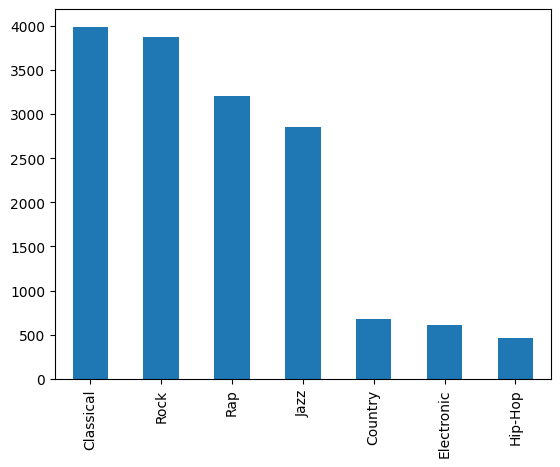

In [86]:
data['music_genre'].value_counts().plot.bar()

*3990(around 25%) out of 15681 are classical instruments.only 458 (around 2%) are Hip Hop*

*Now, let’s visualize each variable separately.*

**2.All the Numerical Variables**

In [87]:
# Creating a list of numerical values

numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print("The length of numerical variables: " ,len(numerical_features),'\n')

#display the numerical variables

data[numerical_features].head()

The length of numerical variables:  11 



,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,0.147134,-14.140,0.046404,143.788,0.598965
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0.174655,-13.716,0.039949,NaN,0.357194
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,0.119917,105.018,0.635525
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,0.124637,-4.262,0.167493,NaN,0.983750
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,0.039139,112.183,0.074412


**3.Distribution of Numerical Variables**

**3.1. Discrete Variables**

In [88]:
#Numerical Variables are usually of two types - Continuous and discrete

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25]  # Simply consider values below 25 as discrete

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


*hence all 11 are continuous*

**UNIVARIATE ANALYSIS**

**Histogram**

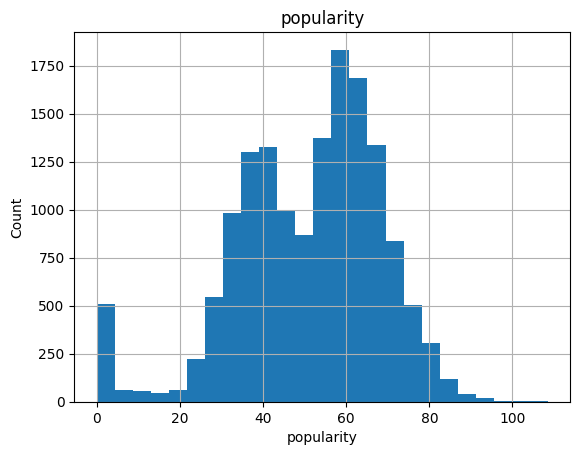

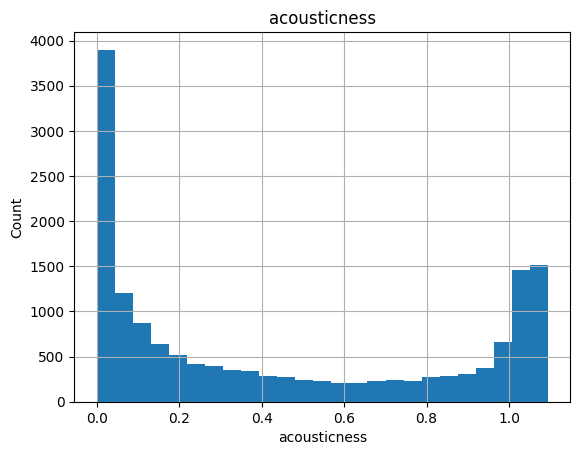

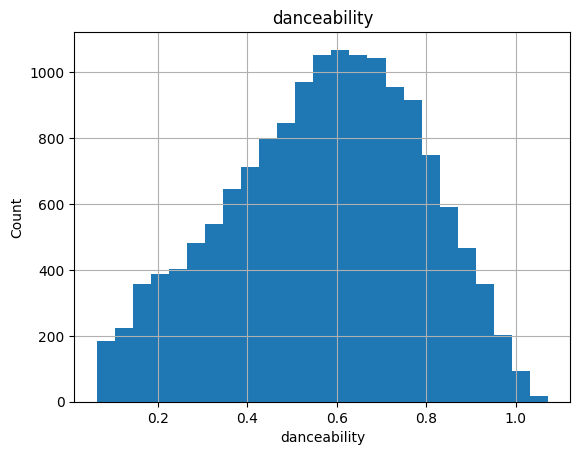

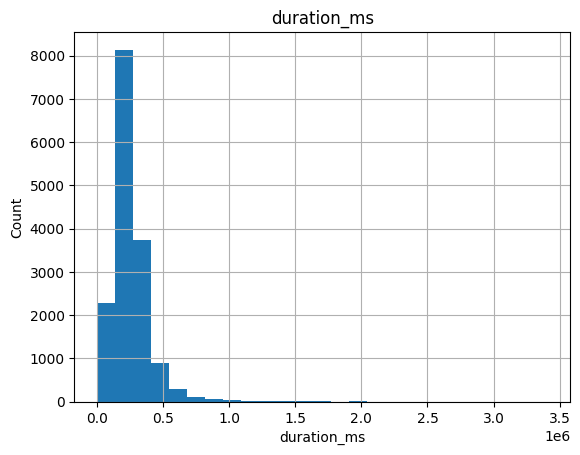

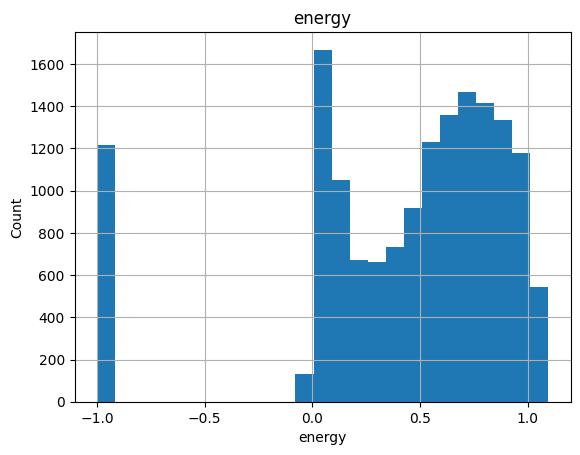

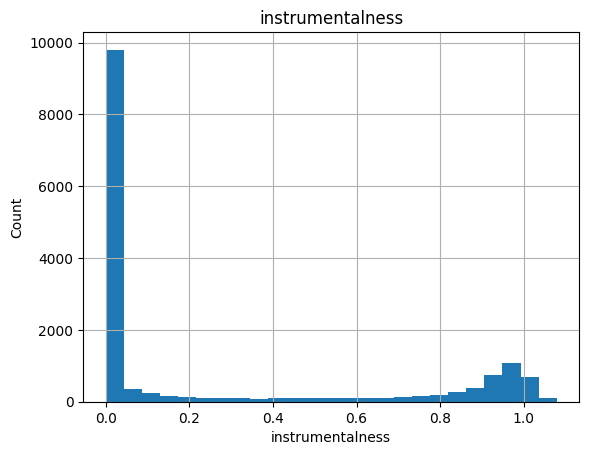

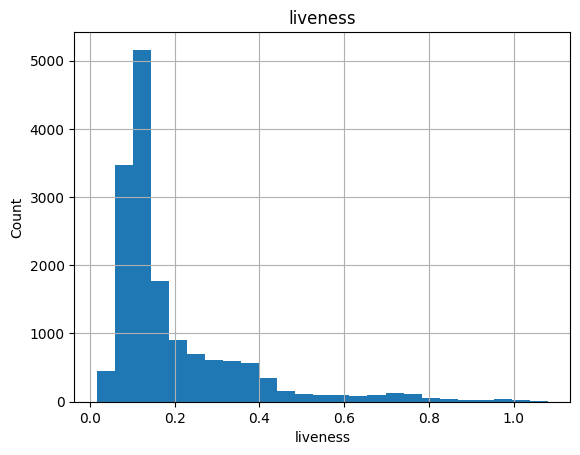

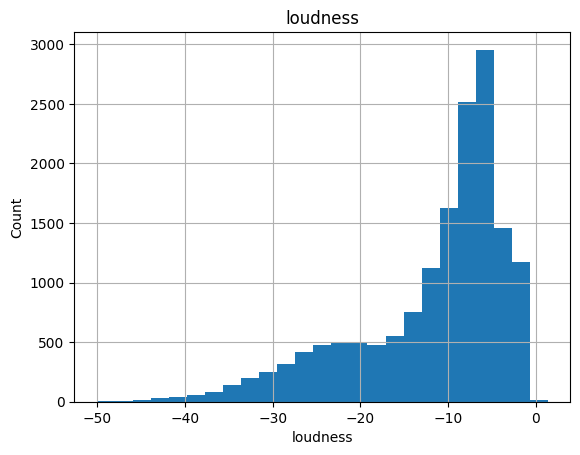

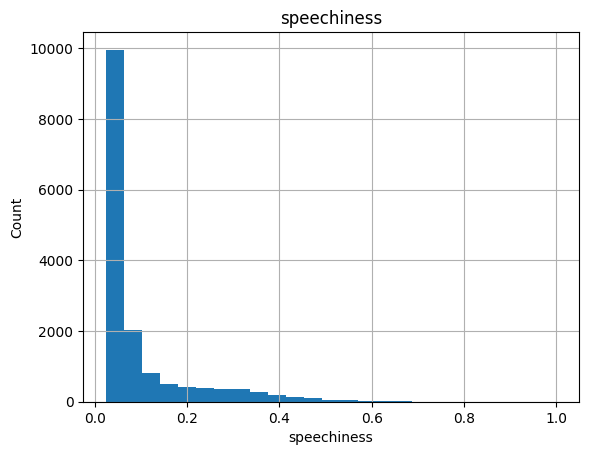

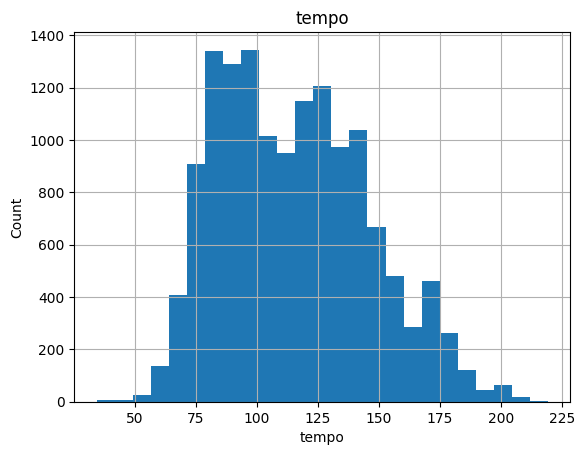

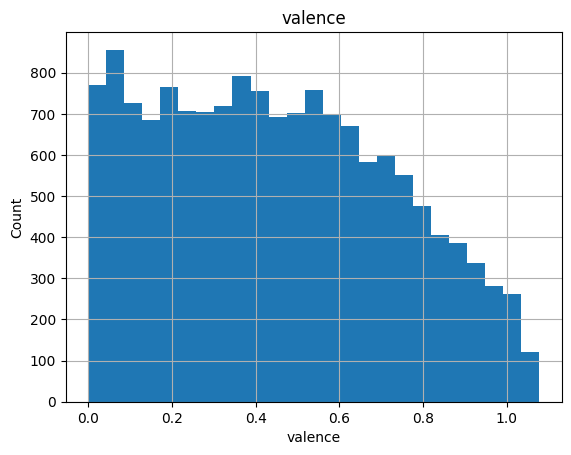

In [89]:
#Analyzing the Distribution of Continuous variables

for feature in numerical_features:
    df = data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

*onlytempo dencability and popularity resemble somewhat normal distribution, which means the data is symmetrically distributed around the mean, and the majority of the data points cluster near the center of the distribution. Others are skewed in nature.*

**4.Outliers**

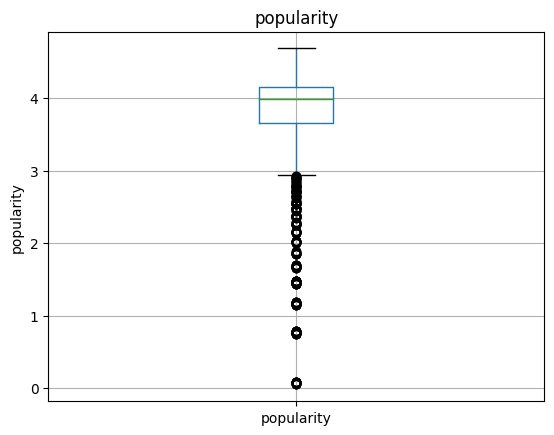

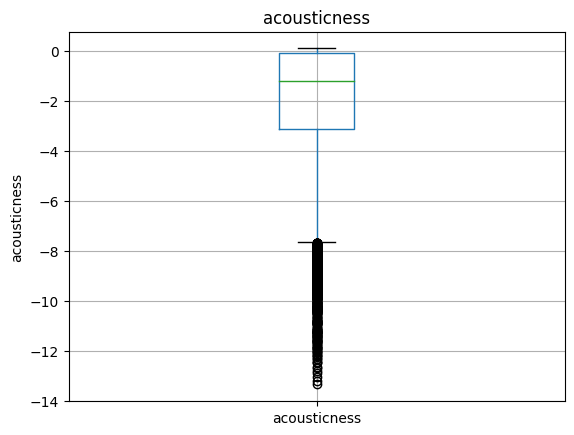

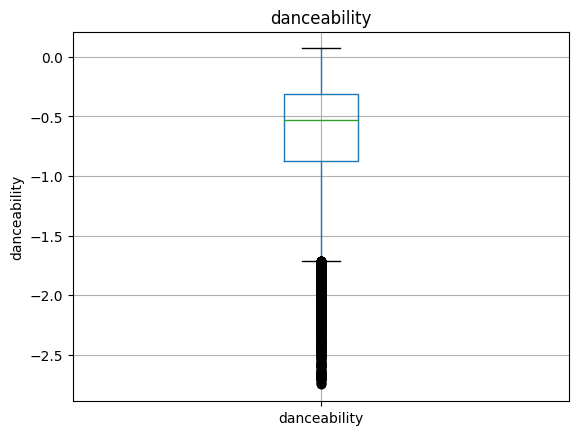

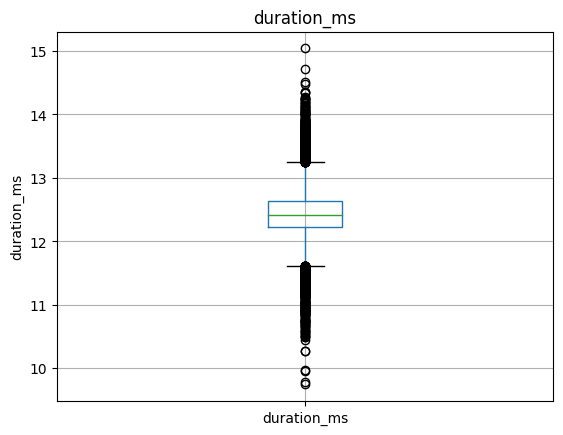

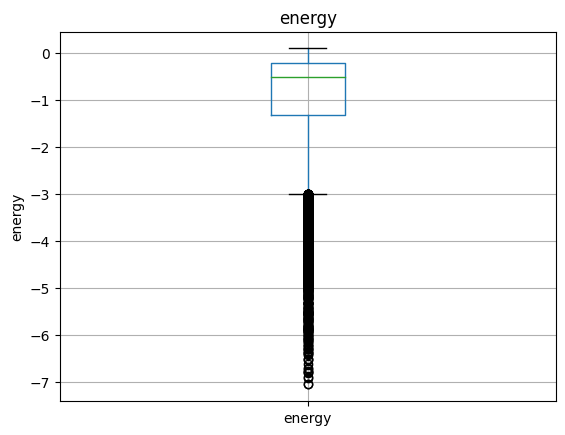

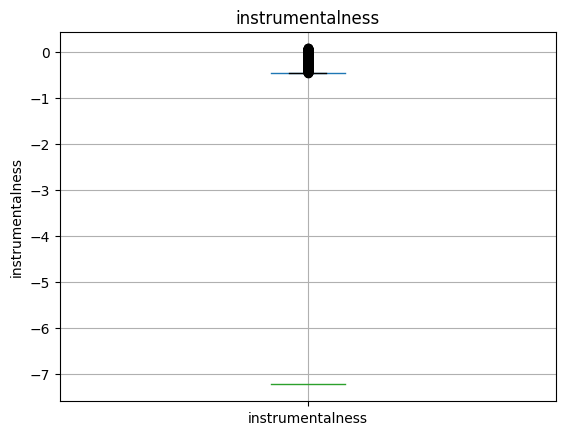

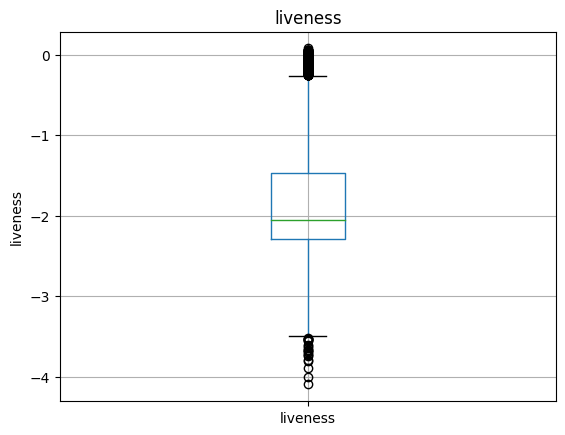

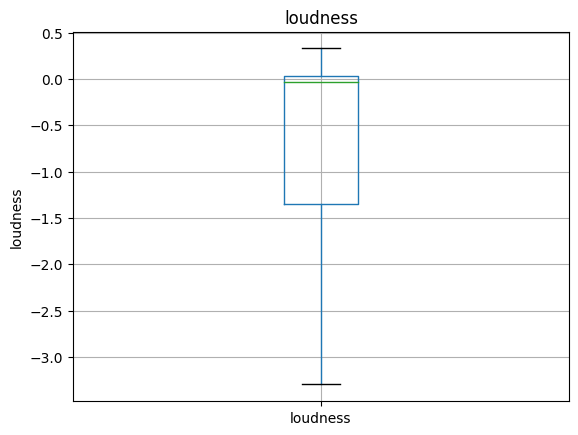

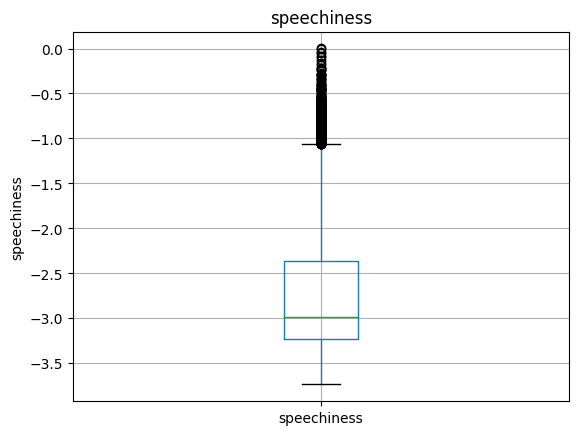

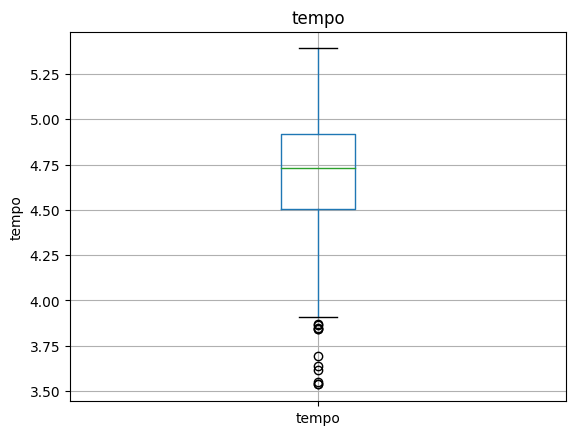

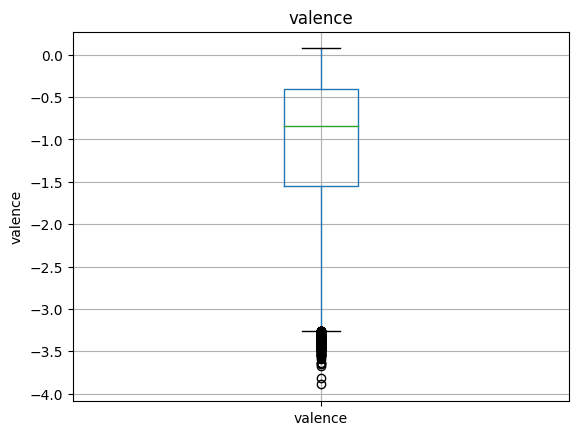

In [90]:
#Boxplot of the Continous Features

for feature in numerical_features:
    df = data.copy()
    df[feature] = np.log(df[feature])
    df.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

*Apply a logarithm transformation to the features. Depending on the data and the distribution of values, A boxplot is a useful way to display the distribution of data through its quartiles and potential outliers. By applying the logarithm transformation, you can better understand the distribution of skewed data and potential patterns or outliers.*

*All of the variables in the boxplot clearly exhibit outliers, except for the column 'loudness'.*

**5.Categorical Variables**

In [91]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['instance_id',
 'track_name',
 'key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre']

In [92]:
print("Categorical feature Count {}".format(len(categorical_features)))

Categorical feature Count 7


In [93]:
data[categorical_features].head()

,instance_id,track_name,key,voice_gender,mode,musician_category,music_genre
0,MSC_83537.0,Estrellitas y Duendes,Scale E,NaN,Major,Band,Jazz
1,MSC_22044.0,Al Norte,Scale A,Male,<NA>,Band,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),Scale D,Female,Major,Band,Rap
3,MSC_76365.0,Can’t You See,Scale D,Both,Major,Duet,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",Scale F Sharp,Female,Minor,Band,Classical


In [94]:
#Checking Cardinality

for feature in categorical_features:
    print("The feature is {} and number of labels are {}".format(feature,len(data[feature].unique())))

The feature is instance_id and number of labels are 15681
The feature is track_name and number of labels are 14799
The feature is key and number of labels are 12
The feature is voice_gender and number of labels are 4
The feature is mode and number of labels are 4
The feature is musician_category and number of labels are 4
The feature is music_genre and number of labels are 7


In [ ]:
#to plot the count of each category in the categorical variable


for features in categorical_features:
  features=pd.crosstab(data[features],data['music_genre'])
  features.plot(kind="bar", figsize=(4,4))
  plt.show()

*The countplot displays some class imbalance, indicating that the frequency of data points in the various categories is significantly different from one another.*

#**2. Data Preprocessing**

Missing Value Handling

Outlier Handling

Encoding

Feature Scaling

Dimensionality reduction

Feature Selection

**1.Missing Value Handling**

In [108]:
#features with missing values

features_with_na

['popularity',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'voice_gender',
 'mode',
 'speechiness',
 'tempo',
 'musician_category',
 'valence']

In [109]:
# Mean filling

for feature  in ['popularity','danceability','tempo']:
    data[feature ]=data[feature ].fillna(data[feature ].mean())

In [117]:
data.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                float64
musician_category     object
valence              float64
music_genre           object
dtype: object

In [118]:
# Median filling

for feature  in ['duration_ms','energy','instrumentalness','loudness','speechiness','valence']:
    data[feature ]=data[feature ].fillna(data[feature ].median())

In [130]:
# Mode filling

for feature  in ['mode','musician_category','voice_gender']:
    data[feature ]=data[feature ].fillna(data[feature ].mode().iloc[0])

In [131]:
data.isnull().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

**2.Outlier Handling**

In [122]:
numerical_features


['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [132]:
outliers=['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
  'speechiness',
 'tempo',
 'valence']
# Outlairs are seen  above and below the limit
for feature in outliers:
  Q1 = data[feature].quantile(0.25)
  Q2 = data[feature].quantile(0.50)
  Q3 = data[feature].quantile(0.75)
  print('\n',feature,'\n')
  print('Q1=',Q1)
  print('Q2=',Q2)
  print('Q3=',Q3)
  IQR=Q3-Q1
  print('IQR=',IQR)
  up_lim=Q3+1.5*IQR
  print('Upper limit=',up_lim)
  data[feature]=np.where(data[feature]>up_lim,up_lim,data[feature])


 popularity 

Q1= 39.414
Q2= 53.135
Q3= 63.064
IQR= 23.65
Upper limit= 98.53899999999999

 acousticness 

Q1= 0.044520687
Q2= 0.295272304
Q3= 0.929000511
IQR= 0.884479824
Upper limit= 2.255720247

 danceability 

Q1= 0.42569352
Q2= 0.576149233
Q3= 0.726697041
IQR= 0.301003521
Upper limit= 1.1782023225

 duration_ms 

Q1= 186420.834
Q2= 236212.737
Q3= 296994.754
IQR= 110573.92000000001
Upper limit= 462855.634

 energy 

Q1= 0.159934328
Q2= 0.560388862
Q3= 0.790423309
IQR= 0.6304889810000001
Upper limit= 1.7361567805

 instrumentalness 

Q1= 0.0
Q2= 0.0007190930000000001
Q3= 0.632455414
IQR= 0.632455414
Upper limit= 1.581138535

 liveness 

Q1= 0.101674133
Q2= 0.128783983
Q3= 0.228972916
IQR= 0.127298783
Upper limit= 0.41992109050000004

 speechiness 

Q1= 0.039563077
Q2= 0.050425092
Q3= 0.094140273
IQR= 0.054577195999999994
Upper limit= 0.176006067

 tempo 

Q1= 92.427
Q2= 115.44764061950016
Q3= 134.163
IQR= 41.736000000000004
Upper limit= 196.76700000000002

 valence 

Q1= 0.222388718

Outliers replaced with lower andupper limits

**3. Encoding**

Label Encoding

In [135]:
#lots of preprocessing techniques machine learning models and evaluation matruces are present in this sklearn library
from sklearn.preprocessing import LabelEncoder #import label encoder from sklearn library. preprocessing is sub class of sklearn library. label encoder is imported from this subclass#

In [136]:
le=LabelEncoder() #taking the instance of label encoder to this particular variable

In [138]:
categorical_features

['instance_id',
 'track_name',
 'key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre']

In [159]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['key', 'voice_gender', 'mode', 'musician_category']

# Loop through each column and apply label encoding
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

**4. Feature Scaling**

In [144]:
x = data[numerical_features]

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to our data and create a DataFrame with scaled values
scaled = scaler.fit_transform(x)
scaled =pd.DataFrame(scaled,columns=x.columns)

# Display summary statistics of the scaled DataFrame
scaled.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04,1.568100e+04
mean,2.111555e-16,3.624987e-18,3.883267e-16,1.681088e-16,-2.174992e-17,4.349984e-17,2.764052e-17,-7.431223e-17,4.440609e-17,-2.156867e-16,1.662963e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-2.936243e+00,-1.071836e+00,-2.396618e+00,-2.028549e+00,-2.784880e+00,-6.648694e-01,-1.458866e+00,-4.441639e+00,-1.008508e+00,-2.792573e+00,-1.661520e+00
25%,-6.590486e-01,-9.650668e-01,-6.837999e-01,-4.287995e-01,-5.224262e-01,-6.648694e-01,-6.866830e-01,-4.464167e-01,-7.003016e-01,-7.919269e-01,-8.414647e-01
50%,1.336999e-01,-3.636973e-01,2.861567e-02,-1.518147e-03,2.586608e-01,-6.630494e-01,-4.404667e-01,3.470584e-01,-4.871412e-01,1.050844e-03,-6.676383e-02
75%,7.073607e-01,1.156153e+00,7.414674e-01,5.200731e-01,7.073433e-01,9.358610e-01,4.694664e-01,6.806484e-01,3.707429e-01,6.457273e-01,7.450711e-01
max,2.756975e+00,1.552850e+00,2.376917e+00,1.943382e+00,1.301134e+00,2.065045e+00,2.203691e+00,1.502548e+00,1.977310e+00,2.802209e+00,2.309794e+00


#**Modeling**

**Train Test Split**

In [160]:
# Target variable
y = data['music_genre']

# Features without target variable
X = data.drop(['music_genre','instance_id',
 'track_name'],axis=1)

In [162]:
#split the data into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [163]:
X_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
11134,50.82272,0.153840,0.506715,232621.779,0.920623,0.000000,10,0.140454,-6.068,2,0,0.047925,170.047,2,0.583798
13133,39.00200,1.060670,0.366048,124596.196,0.243514,0.909284,3,0.153078,-20.430,1,0,0.037634,83.976,2,0.047265
2527,46.04100,0.186672,0.658522,278387.539,0.980841,0.492062,11,0.419921,-6.680,1,1,0.047540,167.989,0,0.737214
12689,69.34000,0.005595,0.739165,266823.819,0.852862,0.000003,4,0.419921,-5.143,2,0,0.176006,94.138,0,1.004454
2127,55.83900,0.010653,0.627679,356712.204,0.580167,0.000003,8,0.143230,-6.523,2,0,0.039959,60.003,0,0.555573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,35.72200,1.052189,0.243057,462855.634,0.032316,0.292201,5,0.143627,-26.782,1,0,0.051230,132.250,0,0.038164
13418,71.17000,0.000464,0.424062,246131.419,0.877795,0.000221,9,0.070672,-5.585,2,1,0.085423,146.729,2,0.371694
5390,71.76200,0.033273,0.631742,253625.485,0.791027,0.000022,1,0.184526,-5.301,1,0,0.035498,170.593,0,0.962491
860,61.53200,0.002962,0.693862,243028.405,0.908331,0.000009,0,0.084210,-6.420,0,0,0.033633,124.985,1,0.784373


**SVM**

In [ ]:


#SVM model

from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

In [ ]:
#predict

y_pred=svmclf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy is : ',accuracy_score(y_test,y_pred))